# Project: Investigate a Dataset No-show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1 - Introduction

The database that I will use is the database No-show appointments. This database has medical appointment scheduling data in Brazil. The database has information about the day of the appointment, the location of the hospital, the age of the patient, the patient's health problems, whether or not the patient was reminded of the consultation and whether or not the patient was consulted. It is already described in the database repository that female patients are majority, because they care more about health. The data base can be downloaded on link https://www.kaggle.com/joniarroba/noshowappointments. Given this information, this analysis seeks to answer the following questions:

<ol>
<li>Are really there more females than males?</li>
<li>Is there any day that is realized more schedules and appointments?</li>
<li>Is there any weekday that is realized more schedules and appointments?</li>
<li>The most frequently diseases and the proportions into genders.</li>
<li>Number of days between schedule and appointment.</li>
<li>What time do the schedules happen?</li>
<li>Do all patients receive message?</li>
<li>Why do patients who schedule appointments up to 2 days before they receive no messages?</li>
<li>Does sending the message influence the patient's presence?</li>
<li>Age attendance.</li>
</ol>

<a id='wrangling'></a>
## 2 - Data Wrangling

Before analyzing the data, we will check for missing values, unexpected values and inconsistent values.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('../no_showup/no_show_2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Values Missing
There are no missing values in any of the variables.
#### Age
It has a maximum value of 115 years and a minimum of -1. There is a possibility that the person is 115 years old, but it is difficult. This instance will be investigated to determine if it is the actual age or if it was an error.
Negative age is impossible. This instance can be disregarded because there is no way to identify the real value. An investigation will be conducted to identify if there are more unexpected values.
#### Handcap
The expected values in this variable are 0 and 1, it has been identified that there is a maximum value of 4.
#### PatientID
As patients may have marked more than one query and the PatientID is numeric, then I will turn it into String because no math operation will be used and better to display the values. Further on, a search will be performed to identify whether there are repeated values for this variable.
#### ScheduledDay and AppointmentID
This variable will be divided into Year, Month, Day, Day of Week and Time.

##  2.2 - Age

Removing negative ages

In [6]:
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
df.drop(df[df['Age'] < 0].index,inplace=True)

## 2.3 - Handcap

In [9]:
df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

*** Handcap *** indicates whether or not the patient has any limitations, so the expected values are 'negative' (0) or 'positive' (1). There are different values than expected. Taking into account that the values can also represent the degree of limitation of the patient, then 1 is assigned for values that are positive.

Atualizando os valores diferentes de 0 e 1

In [10]:
df.loc[df['Handcap'] > 1,['Handcap']] = 1
df['Handcap'].value_counts()

0    108285
1      2241
Name: Handcap, dtype: int64

## 2.4 - PatientID

Converting ***PatientId*** to String

In [11]:
df['PatientId'] = df['PatientId'].map(lambda x: '{:.0f}'.format(x))

In [12]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 2.5 - ScheduledDay and AppointmentDay	

In [13]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [16]:
df['s_day'] = df['ScheduledDay'].apply(lambda x:x.day)
df['s_month'] = df['ScheduledDay'].apply(lambda x:x.month)
df['s_year'] = df['ScheduledDay'].apply(lambda x:x.year)
df['s_hour'] = df['ScheduledDay'].apply(lambda x:x.hour)

df['a_day'] = df['AppointmentDay'].apply(lambda x:x.day)
df['a_month'] = df['AppointmentDay'].apply(lambda x:x.month)
df['a_year'] = df['AppointmentDay'].apply(lambda x:x.year)
df['a_hour'] = df['AppointmentDay'].apply(lambda x:x.hour)

df['s_weekday'] = df['ScheduledDay'].apply(lambda x:x.day_name())
df['a_weekday'] = df['AppointmentDay'].apply(lambda x:x.day_name())

### 2.5.1 - Calculating the diffence between ScheduledDay and AppointmentDay

In [17]:
df['number_days'] = (df['AppointmentDay'].apply(lambda x:x.date())-df['ScheduledDay'].apply(lambda x:x.date()))/np.timedelta64(1,'D')

In [18]:
df[df['number_days'] < 0]['number_days'].value_counts()

-1.0    4
-6.0    1
Name: number_days, dtype: int64

In [19]:
df[df['number_days'] < 0]['No-show']

27033    Yes
55226    Yes
64175    Yes
71533    Yes
72362    Yes
Name: No-show, dtype: object

The dates of the scheduled day will be updated to the appointment day.

In [20]:
df.loc[df['number_days'] < 0,'AppointmentDay'] = df.loc[df['number_days'] < 0,'ScheduledDay']

In [22]:
df['number_days'] = (df['AppointmentDay'].apply(lambda x:x.date())-df['ScheduledDay'].apply(lambda x:x.date()))/np.timedelta64(1,'D')

df['s_day'] = df['ScheduledDay'].apply(lambda x:x.day)
df['s_month'] = df['ScheduledDay'].apply(lambda x:x.month)
df['s_year'] = df['ScheduledDay'].apply(lambda x:x.year)
df['s_hour'] = df['ScheduledDay'].apply(lambda x:x.hour)

df['a_day'] = df['AppointmentDay'].apply(lambda x:x.day)
df['a_month'] = df['AppointmentDay'].apply(lambda x:x.month)
df['a_year'] = df['AppointmentDay'].apply(lambda x:x.year)
df['a_hour'] = df['AppointmentDay'].apply(lambda x:x.hour)

df['s_weekday'] = df['ScheduledDay'].apply(lambda x:x.day_name())
df['a_weekday'] = df['AppointmentDay'].apply(lambda x:x.day_name())

### 2.6 - No-show

In [23]:
df.rename(columns={'No-show':'Show'},inplace=True)

In [24]:
df.loc[df['Show'] == 'No',['Show']] = 1
df.loc[df['Show'] == 'Yes',['Show']] = 0

In [25]:
df.loc[df['Show'] == 1,['Show']] = 'Yes'
df.loc[df['Show'] == 0,['Show']] = 'No'

### 2.7 - AppointmentID

There is no information in thin column, so it can be droped.

In [39]:
df.drop('AppointmentID',inplace=True,axis=1)

<a id='eda'></a>
## 3 - Exploratory Data Analysis

### 3.1 - Are really there more females than males?

The first analysis is about duplicateds patients ids. Each patient can schedule more than one appointment. To count the number of patients by sex it's necessary to do it.

In [30]:
patient_ids = df.drop_duplicates(subset='PatientId')

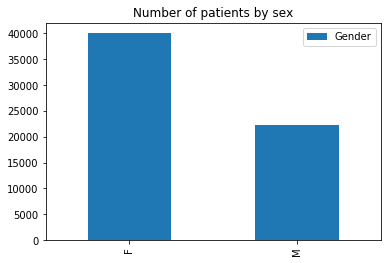

In [38]:
patient_ids['Gender'].value_counts().plot(kind='bar',title='Number of patients by sex',legend=True)

> This plot show that the number of females is bigger than male, confirming the affirmation done before.

### 3.2 - Is there any day that is realized more schedules and appointments?

Text(0.5,0,'Day')

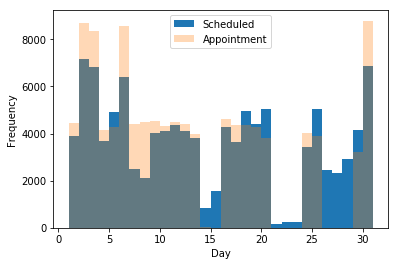

In [50]:
ax = df['s_day'].plot.hist(bins=30,legend=True,label='Scheduled')
ax = df['a_day'].plot.hist(bins=30,alpha=0.3,legend=True,label='Appointment')
ax.set_xlabel("Day")

> The number of schedules and appointment are bigger on beginning and the end of the month. In the middle of the month the number is the smaller than the rest of the month.

### 3.3 - Is there any weekday that is realized more schedules and appointments?

In [98]:
#df['s_weekday'].value_counts().plot(kind='bar')
#df['a_weekday'].value_counts().plot(kind='bar')

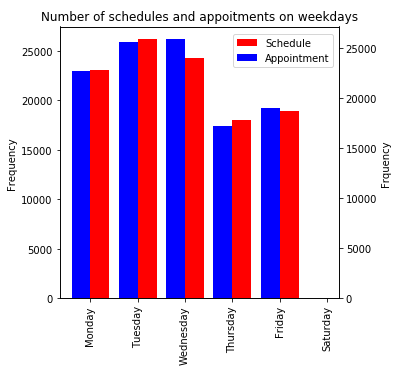

In [112]:
fig = plt.figure(figsize=(5,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
df['s_weekday'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']).plot(kind='bar', color='red', ax=ax, width=width, position=0,label='Schedule',title='Number of schedules and appoitments on weekdays')
df['a_weekday'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']).plot(kind='bar', color='blue', ax=ax2, width=width, position=1,label='Appointment')
ax.set_ylabel('Frequency')
ax2.set_ylabel('Frquency')
fig.legend(bbox_to_anchor=(0.94, 0.95))

> Tuesday and Wednesday are the weekdays that have more schedules and appointments. Thursday and Friday are the weekdays that have less schedules and appointments.

### 3.4 The most frequently diseases and the proportions into genders

Text(0.5,0,'Diseases')

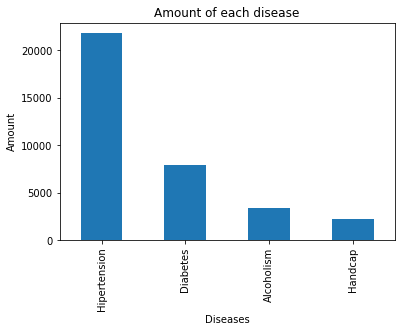

In [222]:
ax = df[['Hipertension','Diabetes','Alcoholism','Handcap']].sum().plot(kind='bar')
ax.set_title('Amount of each disease')
ax.set_ylabel('Amount')
ax.set_xlabel('Diseases')

In [123]:
import seaborn as sns

Text(0.5,1,'Diseases and Age Correlation')

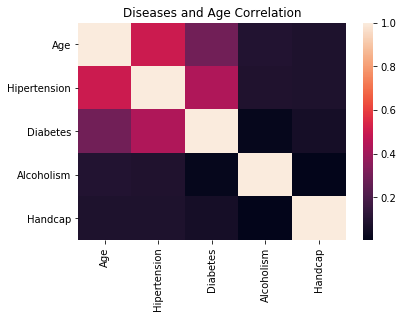

In [130]:
ax = plt.axes()
sns.heatmap(df[['Age','Hipertension','Diabetes','Alcoholism','Handcap']].corr())
ax.set_title('Diseases and Age Correlation')

Text(0,0.5,'Amount')

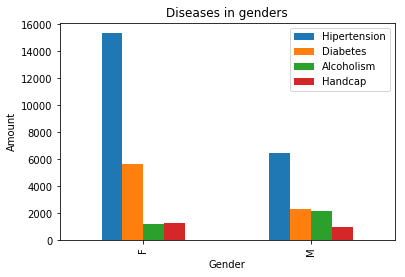

In [221]:
ax = df.groupby('Gender')[['Hipertension','Diabetes','Alcoholism','Handcap']].sum().plot(kind='bar',title='Diseases in genders')
ax.set_ylabel('Amount')

In [132]:
df.groupby('Gender')[['Hipertension','Diabetes','Alcoholism','Handcap']].sum()

,Hipertension,Diabetes,Alcoholism,Handcap
Gender,,,,
F,15339,5606,1223,1290
M,6462,2337,2137,951


In [213]:
temp = df.groupby('Gender')[['Hipertension','Diabetes','Alcoholism','Handcap']].sum()

In [214]:
temp["sum"] = temp.sum(axis=1)

In [215]:
temp

,Hipertension,Diabetes,Alcoholism,Handcap,sum
Gender,,,,,
F,15339,5606,1223,1290,23458
M,6462,2337,2137,951,11887


In [216]:
temp2 = temp.loc[:,['Hipertension','Diabetes','Alcoholism','Handcap']].div(temp["sum"], axis=0)

In [217]:
temp2

,Hipertension,Diabetes,Alcoholism,Handcap
Gender,,,,
F,0.653892,0.238980,0.052136,0.054992
M,0.543619,0.196601,0.179776,0.080003


Text(0,0.5,'Proportion')

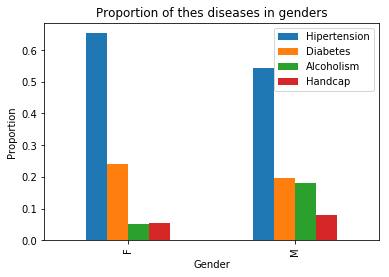

In [219]:
ax = temp2.plot(kind='bar',title='Proportion of thes diseases in genders')
ax.set_ylabel('Proportion')

> It's possible to see that Hipertension and Diabetes are the diseases with more occurrences in both gender, but in females are more frequently. These two diseases are related with age, as can be seen on heatmap. Alcoholism and Handcap is much more frequently in males.

### 3.5 Number of days between schedule and appointment

In [166]:
df['number_days'].describe()

count    110526.000000
mean         10.183884
std          15.254962
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: number_days, dtype: float64

Text(0,0.5,'Amount')

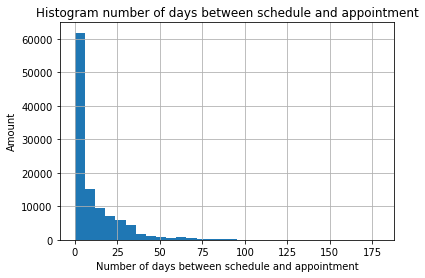

In [210]:
ax = df['number_days'].hist(bins=30)
ax.set_title('Histogram number of days between schedule and appointment')
ax.set_xlabel('Number of days between schedule and appointment')
ax.set_ylabel('Amount')

In [174]:
df['number_days'].value_counts()[0]/df['number_days'].value_counts().sum()

0.3489405207824403

> Approximately 35% of schedules are realized on same day of the appointment. 50% of appointments are scheduled for up to 1 week after. 75% of appointments are scheduled for up to 2 weeks after.

### 3.6 - What time do the schedules happen?

Text(0,0.5,'Amount')

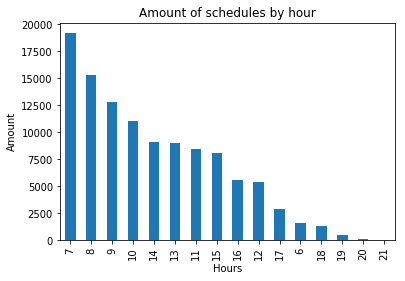

In [207]:
ax = df['s_hour'].value_counts().plot(kind='bar')
ax.set_title('Amount of schedules by hour')
ax.set_xlabel('Hours')
ax.set_ylabel('Amount')

In [176]:
df['s_hour'].describe()

count    110526.000000
mean         10.774542
std           3.216192
min           6.000000
25%           8.000000
50%          10.000000
75%          13.000000
max          21.000000
Name: s_hour, dtype: float64

> These two reports show that most appointments are scheduled starting at 6 o'clock in the morning, 50% are scheduled until 10 o'clock in the morning and 75 percent of appointments are scheduled until 1 p.m.

### 3.7 - Do all patients receive message?

In [177]:
df.groupby('number_days')['SMS_received'].sum().head()

number_days
0.0       0
1.0       0
2.0       0
3.0     906
4.0    3054
Name: SMS_received, dtype: int64

Text(0,0.5,'Amount')

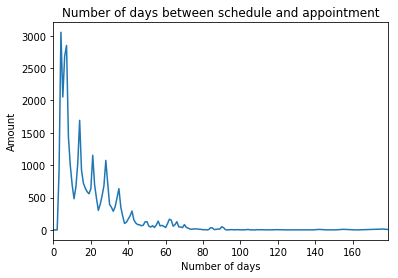

In [206]:
ax = df.groupby('number_days')['SMS_received'].sum().plot(title='Number of days between schedule and appointment')
ax.set_xlabel('Number of days')
ax.set_ylabel('Amount')

Text(0.5,0,'Weekdays')

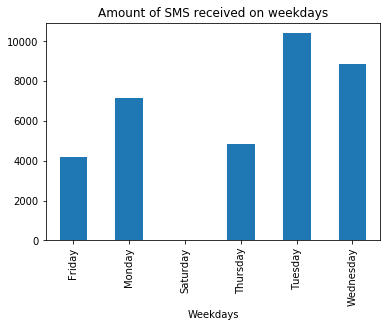

In [203]:
ax = df.groupby('a_weekday')['SMS_received'].sum().plot(kind='bar',title='Amount of SMS received on weekdays')
ax.set_xlabel('Weekdays')
#ax.title('SMS received on weekdays')

> No, neither all patients receive message. The messages are sent when the appointment is 3 days after the schedule, because there was no message received when the difference enter the days was up to 2 days. The messages are apparently sent on the day of the appointment because the message amount is larger on the same days of the week that appointments occurs, on Tuesday and Wednesday.

### 3.7.1 - Why do patients who schedule appointments up to 2 days before they receive no messages? 

In [191]:
temp = df[df['number_days'] < 3]

In [192]:
temp.groupby(['SMS_received','Show'])['PatientId'].count()/temp.groupby(['SMS_received','Show'])['PatientId'].count().sum()

SMS_received  Show
0             No      0.089338
              Yes     0.910662
Name: PatientId, dtype: float64

> Because this group of patients have more than 91% of presence on appointments, it is not so necessary to send message to them.

### 3.8 -  Does sending the message influence the patient's presence?

In [189]:
temp = df[df['number_days'] > 2]
temp2 = temp.groupby(['SMS_received','Show'])['PatientId'].count()

In [197]:
temp2.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

SMS_received  Show
0             No      32.694894
              Yes     67.305106
1             No      27.574545
              Yes     72.425455
Name: PatientId, dtype: float64

> This table shows that the patients that received messages go to the appointment more than who don't receive. So, receive message influence the patient goes to the appointment.

### 3.9 - Age attendance

In [193]:
b1 = df[df['Show'] == 'Yes']
b2 = df[df['Show'] == 'No']

Text(0,0.5,'Density')

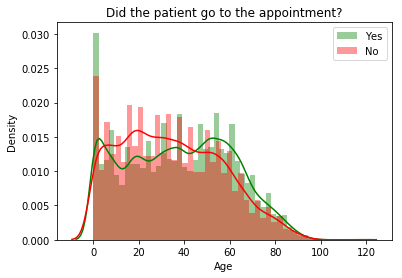

In [200]:
ax = sns.distplot( b1['Age'] , color="green", label="Yes")
ax = sns.distplot( b2['Age'] , color="red", label="No")
ax.set_title('Did the patient go to the appointment?')
ax.legend()
ax.set_ylabel('Density')

> Through this plot it is possible to identify that patients with 20 years are the ones who lack the most appointments, while patients with approximately 55 years are the most assiduous.

<a id='conclusions'></a>
## 4 - Conclusions

<ol>
<li>The females are more carefull than males about health
<li>The age of the patientes vary. Goes since 0 years until 115 years. The patients with until 5 years and more than 55 years are more assíduos. While the patients with 20 years are less assíduos. 
<li>The schedules and appointments are occur on the begnning and on the of months. The middle of the month has less schedules and appointments. Between the days 20 and 25 has few schedules and appointments. 
<li>The weekdays with more schedules and appointments are Tuesday and Wednesday. Saturday has few schedules and appointments.
<li>Hipertension and Diabetes are the two diseases with more occurences, they are correlated between them and with age.
<li>Hipertension and Diabetes are more frequently on females while alcoholism and handcap are more frenquently on males. A information Worth to highlight is the amount of males with alcoholism is extremaly high and it scare.
<li>The majory of the appointments are scheduled for the same day of the schedule.
<li>The messages are sent only with the appointment is scheduled for 3 days after, because with less than 3 days the patients have more than 91% of attendance, so they don’t need be remembered. To send messagem influence the patients attendance.
<li>The hours that have more schedules are between 7:00 a.m. and 13:00.
</ol>

### 4.1 - Decisions

With theses conclusions we can made some decisions:

<ol>
<li>Stimulate the men care more your heath
<li>Create campaigns against alcoholism in men.
<li>Stimulate appointments in different days of Tuesday and Wednesday, maybe a better price in others days.
<li>Send messages to patientes with age group about 20 years.
</ol>